# 한글 워드 클라우드 - 여친선물

#### KoNLPy 설치
- KoNLPy 오류시 참고'로 검색
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 들어가서 jpype1 설치
- JPype1‑1.1.2‑cp38‑cp38‑win_amd64.whl
- conda activate base
- pip install konlpy
- 관리자 권한으로 cmd 실행
- pip install tweepy ==3.10.0
- vscode 재실행
 

In [4]:
import konlpy
konlpy.__version__

'0.5.2'

In [5]:
# Open Korean Text
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다.')

['해당', '에러', '발생', '것', '알', '수']

#### 여친 선물 - 워드 클라우드 만들기
- 크롤링해서 데이터만들고 워드 클라우드 만들기

In [6]:
with open('data/gift.txt',encoding='utf8') as file:
    gift_text = file.read()

In [19]:
tokens = okt.nouns(gift_text) # nouns 명사 nouns 는 명사
tokens

['반지',
 '목걸이',
 '커플',
 '가디건',
 '커플',
 '모자',
 '신지',
 '몇개',
 '추천',
 '제품',
 '투척',
 '더',
 '클래식',
 '남녀',
 '커플룩',
 '버핏',
 '빅사',
 '이즈',
 '하프',
 '니트',
 '가디건',
 '남녀',
 '공용',
 '체크',
 '라인',
 '버핏',
 '가디건',
 '커플룩',
 '로파',
 '웨어',
 '커플',
 '버핏',
 '가디건',
 '남자',
 '여자',
 '봄',
 '가을',
 '겨울',
 '루즈',
 '핏',
 '니트',
 '남녀',
 '공용',
 '커플',
 '버핏',
 '스냅',
 '가디건',
 '남녀',
 '공용',
 '버핏',
 '커플',
 '패턴',
 '니트',
 '가디건',
 '컬러',
 '인기',
 '신상',
 '남여',
 '가을',
 '겨울',
 '버핏',
 '넥',
 '니트',
 '가디건',
 '커플',
 '가디건',
 '남녀',
 '공용',
 '버핏',
 '체크',
 '브이넥',
 '버튼',
 '커플',
 '가디건',
 '컬러',
 '남여',
 '공용',
 '아우',
 '터',
 '루즈',
 '핏',
 '이드',
 '카라',
 '커플룩',
 '가디건',
 '레인보우',
 '영문',
 '레터',
 '링',
 '포인트',
 '블랙',
 '볼캡',
 '커플',
 '모자',
 '야구모',
 '브랜드',
 '모자',
 '추천',
 '쇼핑',
 '도움',
 '채택',
 '파트너',
 '스',
 '커미션',
 '지급',
 '수',
 '샵',
 '수호',
 '돼지',
 '디',
 '퓨저',
 '핸드',
 '메이드',
 '샵',
 '샵',
 '공장',
 '상품',
 '율',
 '한번',
 '구매',
 '또',
 '개지',
 '림',
 '저',
 '마크',
 '곤잘레스',
 '후드',
 '티',
 '추천',
 '스몰',
 '사인',
 '로고',
 '후디',
 '그레이',
 '노미',
 '네이션',
 '컴포저블',
 '팔찌',
 '선물',
 '추천',
 '개',
 '

In [38]:
# 한글 이외의 글자는 제거
import re
new_tokens = []
for token in tokens:
    new_token = re.sub('[^가-힣 ]','',token)
    if new_token:           # ''는 포함시키지 말것.
        new_tokens.append(new_token)


'서프라이즈'

In [ ]:
new_token
new_tokens

In [21]:
if '':
    print('a')
else:
    print('b')

b


In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 처리

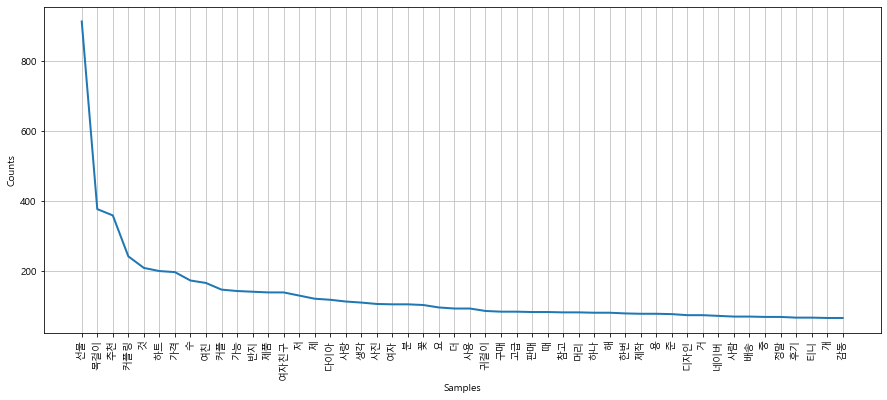

In [32]:
import nltk
gf_gift = nltk.Text(new_tokens,name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [42]:
stop_list = ['선물','추천']


In [70]:
stop_word = '선물 추천 것 가격 수 여친 커플 가능 제품 여자친구 체 제 사랑 생각 여자 분 상품 감동 요'
stop_list = stop_word.split()

In [90]:
new_tokens_list = [token for token in new_tokens if token not in stop_list]


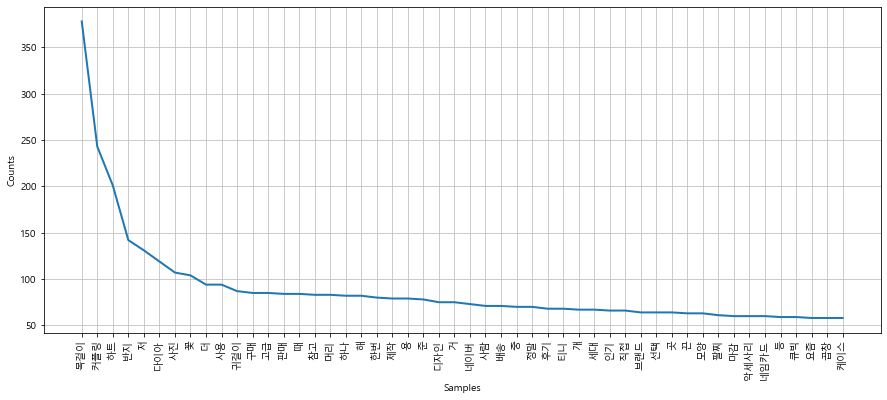

In [91]:
new_tokens_list
import nltk
gf_gift = nltk.Text(new_tokens_list,name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [92]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud


In [93]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 378),
 ('커플링', 243),
 ('하트', 201),
 ('반지', 142),
 ('저', 131),
 ('다이아', 119),
 ('사진', 107),
 ('꽃', 104),
 ('더', 94),
 ('사용', 94)]

In [94]:
wc =WordCloud(
    font_path='c:/Window/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white',
).generate_from_frequencies(dict(data))

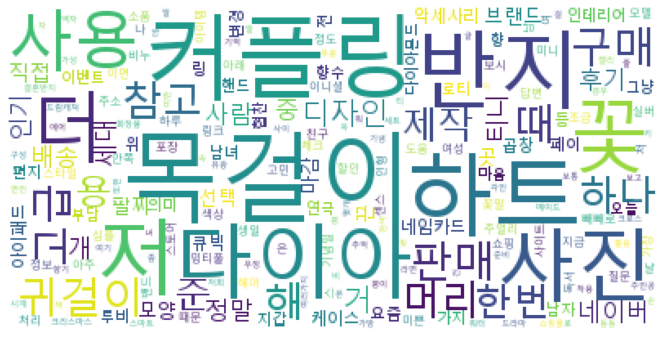

In [95]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 하트 그림에 표시하기

In [96]:
# 하트 그림에 표시하기
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [97]:
wc = WordCloud(
    font_path='c:/Window/Fonts/malgun.ttf',
    relative_scaling=0.2, mask = mask,
    min_font_size=1 , max_font_size=100,
    background_color='white',
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

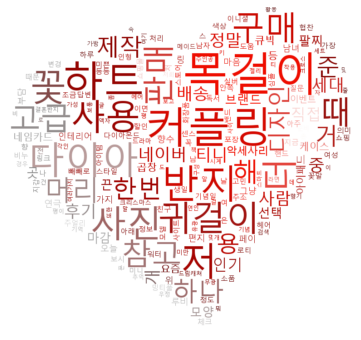

In [98]:
plt.figure(figsize=(12,6))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()